In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading all the datasets

In [2]:
UAV_data1=pd.read_csv('experiment_vol1.csv')

In [3]:
UAV_data2=pd.read_csv('experiment_vol2.csv')

In [4]:
UAV_data3=pd.read_csv('experiment_vol3.csv')

In [5]:
UAV_data4=pd.read_csv('geom_vol1.csv')

In [6]:
UAV_data5=pd.read_csv('geom_vol2.csv')

In [7]:
UAV_data6=pd.read_csv('geom_vol3.csv')

#### Concatenating all the Experiment and Geometry data

In [8]:
UAV_conc1=pd.concat([UAV_data1, UAV_data2,UAV_data3], ignore_index=True)

In [9]:
UAV_conc2=pd.concat([UAV_data4, UAV_data5,UAV_data6], ignore_index=True)

In [10]:
UAV_conc1

,Propeller_name,Blade_name,Propeller_brand,Number_of_blades,Propeller_diameter,Propeller_pitch,Advanced_ratio_Input,RPM_rotation_input,Thrust_coefficient_output,Power_coefficient_output,Efficiency_output,Advanced_ratio_input
0,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.165,4000.000,0.099300,0.053900,0.304,NaN
1,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.214,4000.000,0.094700,0.054300,0.374,NaN
2,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.255,4000.000,0.091600,0.054800,0.427,NaN
3,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.301,4000.000,0.084700,0.054000,0.473,NaN
4,ance 8.5x6.0 - 2,ance 8.5x6.0,ance,2,8.5,6.0,0.340,4000.000,0.079600,0.053000,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27490,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,NaN,5453.333,0.123695,0.063178,0.000,0.0
27491,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,NaN,5960.000,0.123677,0.063333,0.000,0.0
27492,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,NaN,6466.667,0.124291,0.063651,0.000,0.0
27493,ancf 9.0x7.0 - 2,ancf 9.0x7.0,ancf,2,9.0,7.0,NaN,6960.000,0.125048,0.063481,0.000,0.0


#### Merging the two datasets using blade name

In [11]:
merged_df = pd.merge(UAV_conc1, UAV_conc2, on="Blade_name", how="inner")


In [12]:
UAV_data=merged_df

In [13]:
UAV_data=UAV_data.drop(['Propeller_brand_y','Propeller_diameter_y','Propeller_pitch_y'],axis=1)

In [14]:
#UAV_data.rename(columns={'Propeller\'s Name':'propeller_name',
  #     'Blade\'s Name':'blade_name', 
   #    'Propeller\'s Brand_x':'propeller_brand',
    #   'Number of Blades':'number_of_blades',
     #  'Propeller\'s Diameter_x':'propeller_diameter', 
      # 'Propeller\'s Pitch_x':'propeller_pitch',
       #'Advanced Ratio Input':'advanced_ratio_input', 
       #'RPM Rotation Input':'rpm_rotation_input',
       #'Thrust Coefficient Output':'thrust_coefficient', 
       #'Power Coefficient Output':'power_coefficient',
       #'Efficiency Output':'efficiency', 
       #'Propeller\'s Brand_y':'propeller_brand_y', 
      # 'Propeller\'s Diameter_y':'propeller_diameter_y',
       #'Propeller\'s Pitch_y':'propeller_pitch_y', 
       #'Adimensional Chord - c/R':'adimensional_chord',
       #'Adimensional Radius - r/R':'adimensional_radius', 
       #'beta - Angle Relative to Rotation':'beta_angle_relative_to_rotation'}, inplace=True)

In [15]:

# Calculate actual radius
UAV_data["propeller_radius"] = UAV_data["Propeller_diameter_x"] / 2

# Calculate distributions
UAV_data["radius_distribution"] = UAV_data["Adimensional_radius "] * UAV_data["propeller_radius"]
UAV_data["chord_distribution"] = UAV_data["Adimensional_chord "] * UAV_data["propeller_radius"]


In [16]:
UAV_data

,Propeller_name,Blade_name,Propeller_brand_x,Number_of_blades,Propeller_diameter_x,Propeller_pitch_x,Advanced_ratio_Input,RPM_rotation_input,Thrust_coefficient_output,Power_coefficient_output,Efficiency_output,Advanced_ratio_input,Adimensional_chord,Adimensional_radius,beta_angle_relative_to_rotation,beta_Angle_relative_to_rotation,beta _Angle_relative_to_rotation,propeller_radius,radius_distribution,chord_distribution
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1600,0.15,31.68,NaN,NaN,4.5,0.675,0.72000
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1460,0.20,34.45,NaN,NaN,4.5,0.900,0.65700
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1440,0.25,35.93,NaN,NaN,4.5,1.125,0.64800
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1430,0.30,33.33,NaN,NaN,4.5,1.350,0.64350
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1430,0.35,29.42,NaN,NaN,4.5,1.575,0.64350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285793,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2752,0.80,NaN,NaN,13.576,4.5,3.600,1.23840
285794,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2668,0.85,NaN,NaN,12.258,4.5,3.825,1.20060
285795,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2567,0.90,NaN,NaN,10.807,4.5,4.050,1.15515
285796,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2182,0.95,NaN,NaN,8.551,4.5,4.275,0.98190


### Calculating Blade Area

In [17]:
# Group data by blade to calculate area
blade_areas = []

for blade, group in UAV_data.groupby("Blade_name"):
    x = group["radius_distribution"].values
    y = group["chord_distribution"].values

    # Sort by radius to ensure correct integration direction
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]

    area = np.trapz(y_sorted, x_sorted)
    propeller_name = group["Propeller_name"].iloc[0]
    
    blade_areas.append({
        "Blade_name": blade,
        "Propeller_name": propeller_name,
        "blade_area": area
    })

# Convert to DataFrame
blade_area_df = pd.DataFrame(blade_areas)

# Now calculate total blade area per propeller
total_blade_area_df = blade_area_df.groupby("Propeller_name").agg({
    "blade_area": "sum"
}).rename(columns={"blade_area": "total_blade_area"}).reset_index()




#### Calculating Propeller area

In [18]:

# Drop duplicates to get one diameter per propeller
unique_props = UAV_data[["Propeller_name", "Propeller_diameter_x"]].drop_duplicates()

# Calculate radius and disc area
unique_props["propeller_radius"] = unique_props["Propeller_diameter_x"] / 2
unique_props["disc_area"] = np.pi * (unique_props["propeller_radius"] ** 2)

# Final DataFrame: propeller_name, propeller_diameter, radius, disc_area
disc_area_df = unique_props


In [19]:
disc_area_df

,Propeller_name,Propeller_diameter_x,propeller_radius,disc_area
0,apc29ff 9.0x5.0 - 2,9.0,4.5,63.617251
1692,apce 10.0x5.0 - 2,10.0,5.0,78.539816
3564,apce 10.0x7.0 - 2,10.0,5.0,78.539816
5796,apce 11.0x10.0 - 2,11.0,5.5,95.033178
8316,apce 11.0x5.5 - 2,11.0,5.5,95.033178
...,...,...,...,...
249330,nr640 9x5.68 - 2,9.0,4.5,63.617251
255150,nr640 9x7.72 - 3,9.0,4.5,63.617251
255600,nr640 9x7.72 - 4,9.0,4.5,63.617251
256350,nr640 9x7.72 - 2,9.0,4.5,63.617251


In [20]:
UAV_data

,Propeller_name,Blade_name,Propeller_brand_x,Number_of_blades,Propeller_diameter_x,Propeller_pitch_x,Advanced_ratio_Input,RPM_rotation_input,Thrust_coefficient_output,Power_coefficient_output,Efficiency_output,Advanced_ratio_input,Adimensional_chord,Adimensional_radius,beta_angle_relative_to_rotation,beta_Angle_relative_to_rotation,beta _Angle_relative_to_rotation,propeller_radius,radius_distribution,chord_distribution
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1600,0.15,31.68,NaN,NaN,4.5,0.675,0.72000
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1460,0.20,34.45,NaN,NaN,4.5,0.900,0.65700
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1440,0.25,35.93,NaN,NaN,4.5,1.125,0.64800
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1430,0.30,33.33,NaN,NaN,4.5,1.350,0.64350
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,0.306,NaN,0.1430,0.35,29.42,NaN,NaN,4.5,1.575,0.64350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285793,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2752,0.80,NaN,NaN,13.576,4.5,3.600,1.23840
285794,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2668,0.85,NaN,NaN,12.258,4.5,3.825,1.20060
285795,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2567,0.90,NaN,NaN,10.807,4.5,4.050,1.15515
285796,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,0.000,NaN,0.2182,0.95,NaN,NaN,8.551,4.5,4.275,0.98190


In [21]:
blade_area_df

,Blade_name,Propeller_name,blade_area
0,apc29ff 9.0x5.0,apc29ff 9.0x5.0 - 2,2.317612
1,apce 10.0x5.0,apce 10.0x5.0 - 2,3.164375
2,apce 10.0x7.0,apce 10.0x7.0 - 2,3.185000
3,apce 11.0x10.0,apce 11.0x10.0 - 2,3.704869
4,apce 11.0x5.5,apce 11.0x5.5 - 2,3.618656
...,...,...,...
115,nr640 9x7.72,nr640 9x7.72 - 3,1.741297
116,pl 100.0x80.0,pl 100.0x80.0 - 2,0.645247
117,pl 57.0x20.0,pl 57.0x20.0 - 2,0.340453
118,union 9x7.72,union 9x7.72 - 2,4.310719


In [22]:
total_blade_area_df

,Propeller_name,total_blade_area
0,apc29ff 9.0x5.0 - 2,2.317612
1,apce 10.0x5.0 - 2,3.164375
2,apce 10.0x7.0 - 2,3.185000
3,apce 11.0x10.0 - 2,3.704869
4,apce 11.0x5.5 - 2,3.618656
...,...,...
115,nr640 9x7.72 - 3,1.741297
116,pl 100.0x80.0 - 2,0.645247
117,pl 57.0x20.0 - 2,0.340453
118,union 9x7.72 - 2,4.310719


#### Merging all the derived parameters

In [23]:
UAV_data_m=pd.merge(UAV_data,disc_area_df,on='Propeller_name',how='inner')

In [24]:
UAV_data_m1=pd.merge(UAV_data_m,total_blade_area_df,on='Propeller_name',how='inner')

In [25]:
UAV_data_merged=pd.merge(UAV_data_m1,blade_area_df,on='Propeller_name',how='inner')

In [26]:
UAV_data_merged

,Propeller_name,Blade_name_x,Propeller_brand_x,Number_of_blades,Propeller_diameter_x_x,Propeller_pitch_x,Advanced_ratio_Input,RPM_rotation_input,Thrust_coefficient_output,Power_coefficient_output,...,beta _Angle_relative_to_rotation,propeller_radius_x,radius_distribution,chord_distribution,Propeller_diameter_x_y,propeller_radius_y,disc_area,total_blade_area,Blade_name_y,blade_area
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,NaN,4.5,0.675,0.72000,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,NaN,4.5,0.900,0.65700,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,NaN,4.5,1.125,0.64800,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,NaN,4.5,1.350,0.64350,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,NaN,4.5,1.575,0.64350,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261511,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,13.576,4.5,3.600,1.23840,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719
261512,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,12.258,4.5,3.825,1.20060,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719
261513,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,10.807,4.5,4.050,1.15515,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719
261514,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,8.551,4.5,4.275,0.98190,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719


### Calculating Solidity

In [27]:
# Calculate solidity
UAV_data_merged["solidity"] = UAV_data_merged["total_blade_area"] / UAV_data_merged["disc_area"]


In [28]:
UAV_data_merged

,Propeller_name,Blade_name_x,Propeller_brand_x,Number_of_blades,Propeller_diameter_x_x,Propeller_pitch_x,Advanced_ratio_Input,RPM_rotation_input,Thrust_coefficient_output,Power_coefficient_output,...,propeller_radius_x,radius_distribution,chord_distribution,Propeller_diameter_x_y,propeller_radius_y,disc_area,total_blade_area,Blade_name_y,blade_area,solidity
0,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,4.5,0.675,0.72000,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612,0.036431
1,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,4.5,0.900,0.65700,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612,0.036431
2,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,4.5,1.125,0.64800,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612,0.036431
3,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,4.5,1.350,0.64350,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612,0.036431
4,apc29ff 9.0x5.0 - 2,apc29ff 9.0x5.0,apc29ff,2,9.0,5.000000,0.158,4007.000,0.088600,0.045800,...,4.5,1.575,0.64350,9.0,4.5,63.617251,2.317612,apc29ff 9.0x5.0,2.317612,0.036431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261511,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,4.5,3.600,1.23840,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719,0.067760
261512,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,4.5,3.825,1.20060,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719,0.067760
261513,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,4.5,4.050,1.15515,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719,0.067760
261514,union 9x7.72 - 2,union 9x7.72,union,2,9.0,7.718262,0.000,17886.667,0.158606,0.083172,...,4.5,4.275,0.98190,9.0,4.5,63.617251,4.310719,union 9x7.72,4.310719,0.067760


#### Checking the total propellers and propellers with missing solidity

In [29]:
total_propellers = UAV_data_merged["Propeller_name"].nunique()
print("Unique propellers in UAV data:", total_propellers)


Unique propellers in UAV data: 120


In [30]:
total_props_with_solidity = UAV_data_merged["solidity"].nunique()
print("Propellers with calculated solidity:", total_props_with_solidity)


Propellers with calculated solidity: 115


In [31]:
missing_solidity_props = UAV_data_merged[UAV_data_merged["solidity"].isnull()]
missing_prop_names = missing_solidity_props["Propeller_name"].unique()

print("Number of propellers without solidity:", len(missing_prop_names))
print("Propeller names without solidity:", missing_prop_names)


Number of propellers without solidity: 0
Propeller names without solidity: []


In [32]:
UAV_data_merged.rename(columns={'Blade_name_x':'Blade_name', 
   'Propeller_brand_x':'Propeller_brand',
      'Propeller_diameter_x_x':'Propeller_diameter', 
      'Propeller_pitch_x':'Propeller_pitch', 
       'Thrust_coefficient_output':'Thrust_coefficient', 
       'Power_coefficient_output':'Power_coefficient',
       'Efficiency_output':'Efficiency', 
        'Adimensional_chord ': 'Adimensional_chord',
        'Adimensional_radius ': 'Adimensional_radius',
        'propeller_radius_x': 'Propeller_radius',
        'radius_distribution': 'Radius_distribution',
        'chord_distribution': 'Chord_distribution',
      'propeller_radius_y':'Propeller_radius',
       'disc_area': 'Disc_area', 
       'total_blade_area': 'Total_blade_area',
       'blade_area':'Blade_area',
        'solidity':'Solidity'}, inplace=True)

In [33]:
# Example DataFrame structure
df = pd.DataFrame({
    "Solidity": UAV_data_merged["Solidity"],
    "Efficiency": UAV_data_merged["Efficiency"],
    "Thrust_coefficient":  UAV_data_merged["Thrust_coefficient"],
    "Power_coefficient": UAV_data_merged["Power_coefficient"]
})


In [34]:
df

,Solidity,Efficiency,Thrust_coefficient,Power_coefficient
0,0.036431,0.306,0.088600,0.045800
1,0.036431,0.306,0.088600,0.045800
2,0.036431,0.306,0.088600,0.045800
3,0.036431,0.306,0.088600,0.045800
4,0.036431,0.306,0.088600,0.045800
...,...,...,...,...
261511,0.067760,0.000,0.158606,0.083172
261512,0.067760,0.000,0.158606,0.083172
261513,0.067760,0.000,0.158606,0.083172
261514,0.067760,0.000,0.158606,0.083172


In [35]:
print(df.dtypes)

Solidity              float64
Efficiency            float64
Thrust_coefficient    float64
Power_coefficient     float64
dtype: object


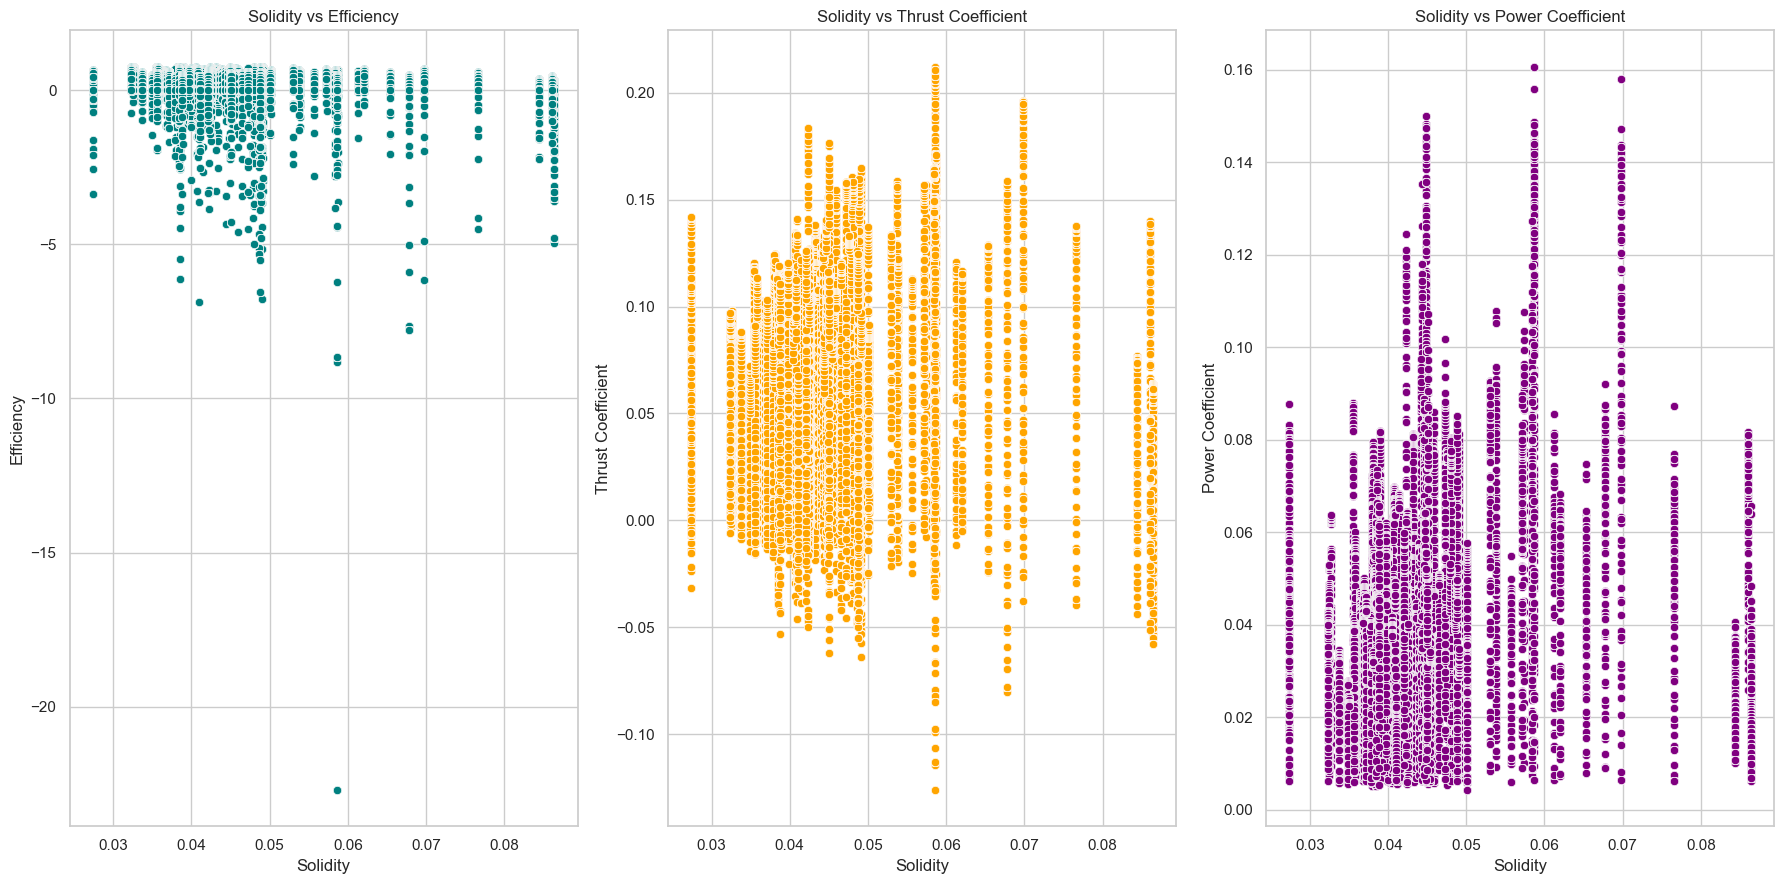

In [36]:
# Set up plotting style
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 9))

# Solidity vs Efficiency
sns.scatterplot(data=df, x="Solidity", y="Efficiency", ax=axs[0], color="teal")
axs[0].set_title("Solidity vs Efficiency")
axs[0].set_xlabel("Solidity")
axs[0].set_ylabel("Efficiency")

# Solidity vs Thrust Coefficient
sns.scatterplot(data=df, x="Solidity", y="Thrust_coefficient", ax=axs[1], color="orange")
axs[1].set_title("Solidity vs Thrust Coefficient")
axs[1].set_xlabel("Solidity")
axs[1].set_ylabel("Thrust Coefficient")

# Solidity vs Power Coefficient
sns.scatterplot(data=df, x="Solidity", y="Power_coefficient", ax=axs[2], color="purple")
axs[2].set_title("Solidity vs Power Coefficient")
axs[2].set_xlabel("Solidity")
axs[2].set_ylabel("Power Coefficient")

plt.tight_layout()
plt.show()


##### From the above plots, It can noted that solidity is more correlated to Power coefficient than with Thrust coefficient and Efficiency.

#### Heat Map of performance Metrics

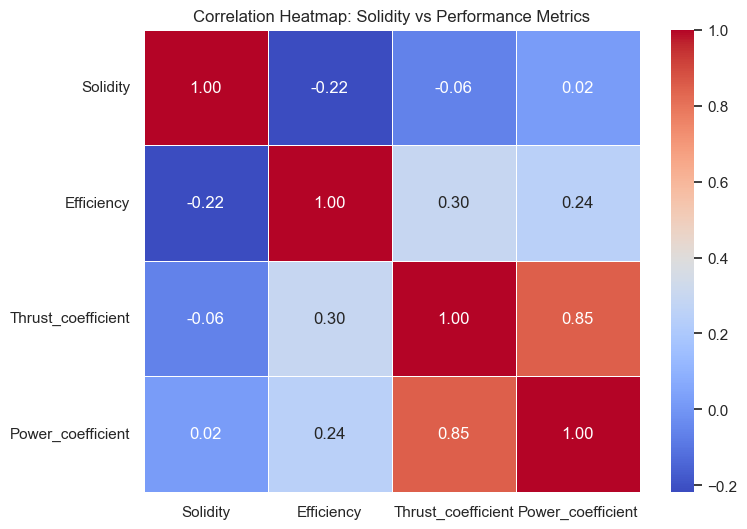

In [37]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Solidity vs Performance Metrics")
plt.show()

##### Solidity has a very weak negative correlation with efficient.Similiarly,eficient has a weak positive correlation with Thrust_efficient and power_efficient.Thrust_efficient has a weak positive correlation with efficient but a very strong positive correlation with power_efficient. Finally, Power_efficient has a very weak correlation with efficient but a very strong correlation with thrust_efficient.

### Model Building

In [38]:
UAV_data_merged.isna().sum()

Propeller_name                           0
Blade_name                               0
Propeller_brand                          0
Number_of_blades                         0
Propeller_diameter                       0
Propeller_pitch                          0
Advanced_ratio_Input                     0
RPM_rotation_input                       0
Thrust_coefficient                       0
Power_coefficient                        0
Efficiency                               0
Advanced_ratio_input                261516
Adimensional_chord                       0
Adimensional_radius                      0
beta_angle_relative_to_rotation      88644
beta_Angle_relative_to_rotation     177486
beta _Angle_relative_to_rotation    256902
Propeller_radius                         0
Radius_distribution                      0
Chord_distribution                       0
Propeller_diameter_x_y                   0
Propeller_radius                         0
Disc_area                                0
Total_blade

In [39]:
UAV_data_merged=UAV_data_merged.drop(['Propeller_diameter_x_y','beta_Angle_relative_to_rotation','beta _Angle_relative_to_rotation','Blade_name_y'],axis=1)

In [40]:
UAV_data_merged=UAV_data_merged.drop(['Advanced_ratio_input'],axis=1)

In [41]:
UAV_data_merged.dropna(subset=['beta_angle_relative_to_rotation'], inplace=True)

In [42]:
UAV_data_merged.isna().sum()

Propeller_name                     0
Blade_name                         0
Propeller_brand                    0
Number_of_blades                   0
Propeller_diameter                 0
Propeller_pitch                    0
Advanced_ratio_Input               0
RPM_rotation_input                 0
Thrust_coefficient                 0
Power_coefficient                  0
Efficiency                         0
Adimensional_chord                 0
Adimensional_radius                0
beta_angle_relative_to_rotation    0
Propeller_radius                   0
Radius_distribution                0
Chord_distribution                 0
Propeller_radius                   0
Disc_area                          0
Total_blade_area                   0
Blade_area                         0
Solidity                           0
dtype: int64

### Building the model

In [43]:
# Filter for 2-blade propellers (training set)
train_df = UAV_data_merged[UAV_data_merged["Number_of_blades"] == 2]

# Filter for all other blade counts (testing set)
test_df = UAV_data_merged[UAV_data_merged["Number_of_blades"] != 2]


In [44]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Define input features
features = ["RPM_rotation_input", "Advanced_ratio_Input", "Propeller_pitch", "Propeller_diameter", "Solidity"]

# Define target variable
target = "Efficiency"

# Drop rows with missing values
train_df = train_df.dropna(subset=features + [target])

# Prepare full dataset for CV
X = train_df[features]
y = train_df[target]

# Model
model = GradientBoostingRegressor(random_state=42)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error"))

print(f"Mean R²: {r2_scores.mean():.4f} | Std: {r2_scores.std():.4f}")
print(f"Mean RMSE: {rmse_scores.mean():.4f} | Std: {rmse_scores.std():.4f}")


Mean R²: 0.8283 | Std: 0.0059
Mean RMSE: 0.2025 | Std: 0.0028


### Model without missing value imputation

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

model_a_data = train_df.dropna(subset=features + [target])
X_a = model_a_data[features]
y_a = model_a_data[target]

model_a = GradientBoostingRegressor(random_state=42)
model_a.fit(X_a, y_a)
pred_a = model_a.predict(X_a)

mse_a = mean_squared_error(y_a, pred_a)
r2_a = r2_score(y_a, pred_a)

print("Model Evaluation on without missing value imputation:")
print(f"Mean Squared Error: {mse_a:.4f}")
print(f"R² Score: {r2_a:.4f}")


Model Evaluation on without missing value imputation:
Mean Squared Error: 0.0409
R² Score: 0.8288


### Model with missing value imputation

In [46]:
from sklearn.impute import SimpleImputer
X_b = train_df[features]
y_b = train_df[target]

# Impute missing values (mean strategy)
imputer = SimpleImputer(strategy="mean")
X_b_imputed = pd.DataFrame(imputer.fit_transform(X_b), columns=features)

# Drop rows with missing target
y_b = y_b[X_b.index]
model_b = GradientBoostingRegressor(random_state=42)
model_b.fit(X_b_imputed, y_b)
pred_b = model_b.predict(X_b_imputed)

mse_b = mean_squared_error(y_b, pred_b)
r2_b = r2_score(y_b, pred_b)

print("Model Evaluation on missing value imputation:")
print(f"Mean Squared Error: {mse_b:.4f}")
print(f"R² Score: {r2_b:.4f}")



Model Evaluation on missing value imputation:
Mean Squared Error: 0.0409
R² Score: 0.8288


### Model without solidity feature

In [47]:
features_no_solidity = [f for f in features if f != "Solidity"]
model_c_data = train_df.dropna(subset=features_no_solidity + [target])

X_c = model_c_data[features_no_solidity]
y_c = model_c_data[target]

model_c = GradientBoostingRegressor(random_state=42)
model_c.fit(X_c, y_c)
pred_c = model_c.predict(X_c)

mse_c = mean_squared_error(y_c, pred_c)
r2_c = r2_score(y_c, pred_c)

print("Model Evaluation on without solidity feature:")
print(f"Mean Squared Error: {mse_c:.4f}")
print(f"R² Score: {r2_c:.4f}")


Model Evaluation on without solidity feature:
Mean Squared Error: 0.0468
R² Score: 0.8043


### Visualization to compare the three models

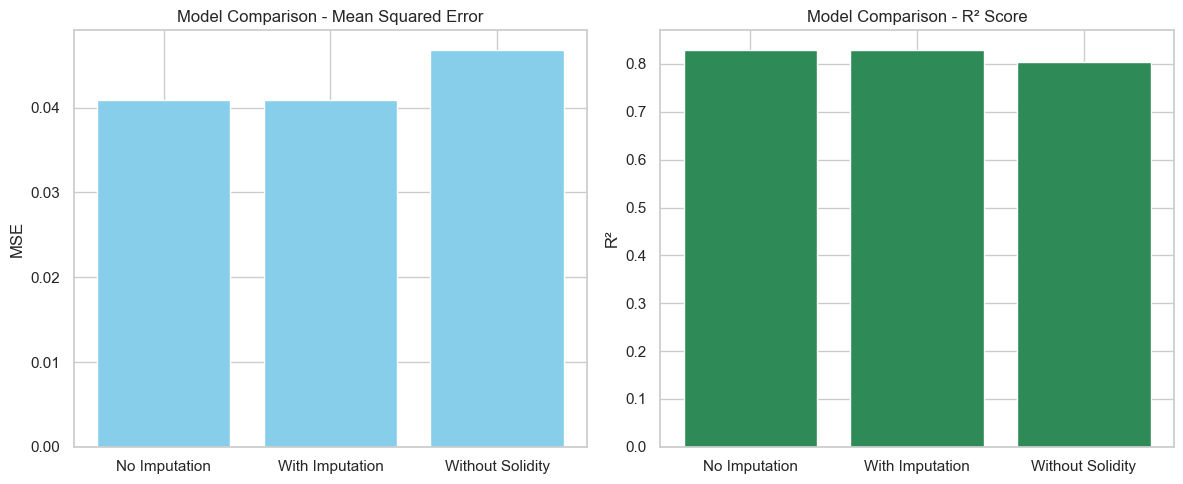

              Model       MSE  R2 Score
0     No Imputation  0.040908  0.828839
1   With Imputation  0.040908  0.828839
2  Without Solidity  0.046775  0.804290


In [48]:
# Create a summary DataFrame
results_df = pd.DataFrame({
    "Model": ["No Imputation", "With Imputation", "Without Solidity"],
    "MSE": [mse_a, mse_b, mse_c],
    "R2 Score": [r2_a, r2_b, r2_c]
})

# Plot comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# MSE
axs[0].bar(results_df["Model"], results_df["MSE"], color="skyblue")
axs[0].set_title("Model Comparison - Mean Squared Error")
axs[0].set_ylabel("MSE")

# R² Score
axs[1].bar(results_df["Model"], results_df["R2 Score"], color="seagreen")
axs[1].set_title("Model Comparison - R² Score")
axs[1].set_ylabel("R²")

plt.tight_layout()
plt.show()

print(results_df)

#### The model is best either "with imputation" or "no imputation" features but not "without Solidity" as could be seen in the mean squared errors and the R-squared results.